In [2]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import os
from os import walk
import matplotlib.pylab as plt
from itertools import combinations


In [3]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        if label == '10-4':
            data_pd_i['Concentration'] = '1 * $10^{-4}$M'
        if label == '10-5':
            data_pd_i['Concentration'] = '1 * $10^{-5}$M'
        if label == '10-6':
            data_pd_i['Concentration'] = '1 * $10^{-6}$M'
        if label == '10-7':
            data_pd_i['Concentration'] = '1 * $10^{-7}$M'
        if label == 'Control':
            data_pd_i['Concentration'] = 'Control'


        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [47]:

# folder_path = "C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\csv"
folder_path = 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted'

files = []
for (dirpath, dirnames, filenames) in walk(folder_path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))

print(files)

['C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\19-07-2023  GA-477.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\19-07-2023 Amb.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\21-07-2023 AMB-UV.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\21-07-2023 GA477 UV.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\520, 533, 614 - бланк вычтен руками.txt', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\Amb.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-349 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-349.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-418 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-477 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\GA-418.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\GA-427.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\Images.pptx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\PGA-357.xlsx', 'C:\\Users\\Modern\\

In [48]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

for file in files:
   file_name_ext = os.path.basename(file)
   file_name,extention = file_name_ext.split(".")

   if '.csv' in file_name_ext:
      print(file)
      file_raw = pd.read_csv(file) 
   
   if '.xlsx' in file_name_ext:
      file_raw = pd.read_excel(file) 
      print(file)

   data_pd = excel_to_pd(data_pd,data_pd_i,file_raw,'Vero',file_name)

# print(data_pd)

C:\Users\Modern\Desktop\Бельская\Converted\19-07-2023  GA-477.csv
C:\Users\Modern\Desktop\Бельская\Converted\19-07-2023 Amb.csv
C:\Users\Modern\Desktop\Бельская\Converted\21-07-2023 AMB-UV.csv
C:\Users\Modern\Desktop\Бельская\Converted\21-07-2023 GA477 UV.csv
C:\Users\Modern\Desktop\Бельская\Converted\Amb.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\BNTM-349 UV.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\BNTM-349.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\BNTM-418 UV.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\BNTM-477 UV.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\GA-418.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\GA-427.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\PGA-357.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\PGA-418.xlsx
C:\Users\Modern\Desktop\Бельская\Converted\csv\BNAB-110.csv
C:\Users\Modern\Desktop\Бельская\Converted\csv\BNTM-494.csv
C:\Users\Modern\Desktop\Бельская\Converted\csv\BNTM-495.csv
C:\Users\Modern\Desktop\Бельская\Converted\csv\GA

<AxesSubplot: xlabel='Substance', ylabel='OD'>

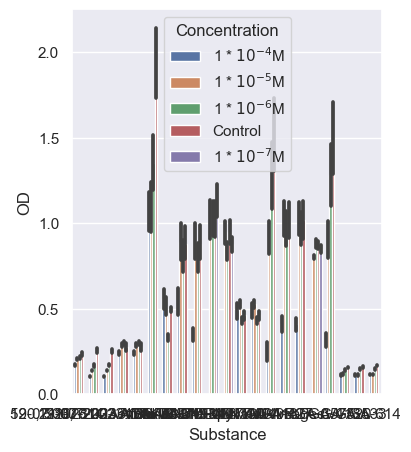

In [35]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

Blank subtraction

In [49]:
unique_substances= data_pd['Concentration'].unique()

unique_concentrations= data_pd['Substance'].unique()

print(unique_substances)

print(unique_concentrations)



['1 * $10^{-4}$M' '1 * $10^{-5}$M' '1 * $10^{-6}$M' 'Control'
 '1 * $10^{-7}$M']
['19-07-2023  GA-477' '19-07-2023 Amb' '21-07-2023 AMB-UV'
 '21-07-2023 GA477 UV' '520, 533, 614 - бланк вычтен руками' 'Amb'
 'BNTM-349 UV' 'BNTM-349' 'BNTM-418 UV' 'BNTM-477 UV' 'GA-418' 'GA-427'
 'Images' 'PGA-357' 'PGA-418' 'BNAB-110' 'BNTM-494' 'BNTM-495' 'GA-520'
 'GA-533' 'GA-614']


In [50]:
data_extracted_substance = data_pd[(data_pd['Substance'] == 'BNTM-494')].copy() 

#Ugly thing for blanks subtraction

high_concentration_OD = data_pd[(data_pd['Concentration'] == '1 * $10^{-4}$M') & (data_pd['Substance'] == 'BNAB-110')].mean()

# print(high_concentration_OD)

blank = high_concentration_OD.iloc[0]

data_extracted_substance['OD_blank_correcetd'] = data_extracted_substance['OD'] - blank

print(data_extracted_substance)



       OD Cell_type Substance   Concentration  OD_blank_correcetd
0   0.250      Vero  BNAB-110  1 * $10^{-4}$M           -0.082417
1   0.289      Vero  BNAB-110  1 * $10^{-4}$M           -0.043417
2   0.368      Vero  BNAB-110  1 * $10^{-4}$M            0.035583
3   0.359      Vero  BNAB-110  1 * $10^{-4}$M            0.026583
4   0.259      Vero  BNAB-110  1 * $10^{-4}$M           -0.073417
..    ...       ...       ...             ...                 ...
19    NaN      Vero  BNAB-110         Control                 NaN
20    NaN      Vero  BNAB-110         Control                 NaN
21    NaN      Vero  BNAB-110         Control                 NaN
22    NaN      Vero  BNAB-110         Control                 NaN
23    NaN      Vero  BNAB-110         Control                 NaN

[96 rows x 5 columns]


C:\Users\Modern\AppData\Local\Temp\ipykernel_1400\3275676930.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_concentration_OD = data_pd[(data_pd['Concentration'] == '1 * $10^{-4}$M') & (data_pd['Substance'] == 'BNAB-110')].mean()


In [59]:
data_extracted_substance = data_pd[(data_pd['Substance'] == 'BNTM-495')].copy() 
print(data_extracted_substance)


       OD Cell_type Substance   Concentration
0   0.262      Vero  BNTM-495  1 * $10^{-4}$M
1   0.385      Vero  BNTM-495  1 * $10^{-4}$M
2   0.530      Vero  BNTM-495  1 * $10^{-4}$M
3   0.399      Vero  BNTM-495  1 * $10^{-4}$M
4   0.633      Vero  BNTM-495  1 * $10^{-4}$M
..    ...       ...       ...             ...
19    NaN      Vero  BNTM-495         Control
20    NaN      Vero  BNTM-495         Control
21    NaN      Vero  BNTM-495         Control
22    NaN      Vero  BNTM-495         Control
23    NaN      Vero  BNTM-495         Control

[96 rows x 4 columns]


Recalculation to relative values:

In [60]:
# data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = data_pd['Substance'].unique()

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_extracted_substance[(data_extracted_substance['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

       OD    Relative Substance   Concentration Cell_type
0   0.262   56.884386  BNTM-495  1 * $10^{-4}$M      Vero
1   0.385   83.589651  BNTM-495  1 * $10^{-4}$M      Vero
2   0.530  115.071467  BNTM-495  1 * $10^{-4}$M      Vero
3   0.399   86.629274  BNTM-495  1 * $10^{-4}$M      Vero
4   0.633  137.434413  BNTM-495  1 * $10^{-4}$M      Vero
..    ...         ...       ...             ...       ...
19    NaN         NaN  BNTM-495         Control      Vero
20    NaN         NaN  BNTM-495         Control      Vero
21    NaN         NaN  BNTM-495         Control      Vero
22    NaN         NaN  BNTM-495         Control      Vero
23    NaN         NaN  BNTM-495         Control      Vero

[96 rows x 5 columns]


In [61]:

# extracted_data = data[(data['Substance'] == '19-07-2023  GA-477')].copy()
# print(data)

unique_concentrations= data['Concentration'].unique()
unique_substances= data['Substance'].unique()

pairs = []
for subst in unique_substances:
    for conc in unique_concentrations:
        # if conc == 'Control':
        #     break
        pairs.append(((subst,conc),(subst,'Control')))
        

print(pairs)


[(('BNTM-495', '1 * $10^{-4}$M'), ('BNTM-495', 'Control')), (('BNTM-495', '1 * $10^{-5}$M'), ('BNTM-495', 'Control')), (('BNTM-495', '1 * $10^{-6}$M'), ('BNTM-495', 'Control')), (('BNTM-495', 'Control'), ('BNTM-495', 'Control'))]


In [13]:
#Without selfreferences

pairs_1 = []

for group1, group2 in combinations(unique_concentrations, 2):
    pairs_1.append(((group1),(group2)))

print(pairs_1)

[('1 * $10^{-4}$M', '1 * $10^{-5}$M'), ('1 * $10^{-4}$M', '1 * $10^{-6}$M'), ('1 * $10^{-4}$M', 'Control'), ('1 * $10^{-5}$M', '1 * $10^{-6}$M'), ('1 * $10^{-5}$M', 'Control'), ('1 * $10^{-6}$M', 'Control')]


       OD    Relative Substance   Concentration Cell_type
0   0.262   56.884386  BNTM-495  1 * $10^{-4}$M      Vero
1   0.385   83.589651  BNTM-495  1 * $10^{-4}$M      Vero
2   0.530  115.071467  BNTM-495  1 * $10^{-4}$M      Vero
3   0.399   86.629274  BNTM-495  1 * $10^{-4}$M      Vero
4   0.633  137.434413  BNTM-495  1 * $10^{-4}$M      Vero
..    ...         ...       ...             ...       ...
19    NaN         NaN  BNTM-495         Control      Vero
20    NaN         NaN  BNTM-495         Control      Vero
21    NaN         NaN  BNTM-495         Control      Vero
22    NaN         NaN  BNTM-495         Control      Vero
23    NaN         NaN  BNTM-495         Control      Vero

[96 rows x 5 columns]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BNTM-495_Control vs. BNTM-495_Control: Kruskal-Wallis independent samples (pairwise between groups) 

(<AxesSubplot: ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x2db6f4485b0>])

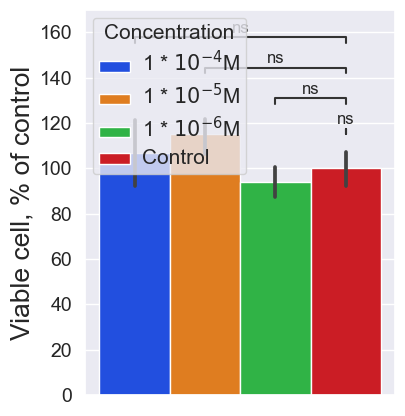

In [62]:
ax = sns.barplot(data = data, x = 'Substance', y = 'Relative', hue = 'Concentration',palette='bright')

print(data)

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,5)})

ax.legend(loc='upper left', title='Concentration')
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='15') 

ax.set(xlabel=None, ylabel='Viable cell, % of control')
ax.set(xticklabels=[])
ax.yaxis.get_label().set_fontsize(19)
ax.xaxis.get_label().set_fontsize(19)
ax.tick_params(axis='y', which='major', labelsize=14)

annotator = Annotator(ax, pairs, data=data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

